<a href="https://colab.research.google.com/github/IshanGupta09/Data_Science_/blob/main/Animated_Weather_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2> 1. Importing Libraries and Datasets

In [ ]:
!pip install gif

  Created wheel for gif: filename=gif-3.0.0-py3-none-any.whl size=4817 sha256=dd61d5c1d2077a8bb1184203491e40280d91553c799b771d29d065f7df87483b
  Stored in directory: /root/.cache/pip/wheels/21/63/09/b1e3c512d244da0a7c1d9565f09592612d04b79ccbb95146ae
Successfully built gif


In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image
import gif
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/weather_hourly_darksky.csv'
data = pd.read_csv(url, error_bad_lines=False)
data.head(10)

visibility  windBearing  ...  humidity        summary
0        5.97          104  ...      0.91  Partly Cloudy
1        4.88           99  ...      0.94  Partly Cloudy
2        3.70           98  ...      0.96  Partly Cloudy
3        3.12           99  ...      0.96          Foggy
4        1.85          111  ...      1.00          Foggy
5        1.96          115  ...      0.97          Foggy
6        1.30          118  ...      0.97          Foggy
7        1.22          114  ...      0.99          Foggy
8        1.40          120  ...      0.97          Foggy
9        1.38          121  ...      0.97          Foggy

[10 rows x 12 columns]

In [ ]:
r,c = data.shape
print("Number of rpws in the dataset    = ",r)
print("Number of columns in the dataset = ",c)

Number of rpws in the dataset    =  21165
Number of columns in the dataset =  12


<center>
<h2>2. Data Preprocessing</h2>
</center>

In [ ]:
data = data.rename(columns={"time": "date"})

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.set_index('date',drop=True, inplace=True)

In [ ]:
data = data.resample('M').mean()
data.head()

visibility  windBearing  ...  windSpeed  humidity
date                                 ...                     
2011-11-30    8.215986   162.320833  ...   3.530500  0.883556
2011-12-31   12.519261   243.370968  ...   5.076720  0.819892
2012-01-31   11.484866   215.395161  ...   4.373333  0.813750
2012-02-29   10.541695   210.794540  ...   3.442011  0.783851
2012-03-31    9.320403   191.595430  ...   2.933952  0.752702

[5 rows x 8 columns]

<center><h2>3. Visualizing by animation</h2></center>

In [ ]:
#Defining the start and end dates
END = data.index[-1]
START = data.index[0]


@gif.frame
def plot(df, date):
    df = df.loc[df.index[0]:pd.Timestamp(date)]
    fig, (ax1) = plt.subplots(1, figsize=(10, 5), dpi=100)
    ax1.plot(df.temperature, marker='o', linestyle='--', linewidth=3, markersize=10, color='tab:pink')
    maxi = round(df.temperature.max() + 5)
    ax1.set_title('Average Monthly Temperature in London over the 2012-2014', fontsize=20)
    ax1.set_xlim([START, END])
    ax1.set_ylim([0, maxi])
    ax1.set_ylabel('Temperature C°', color='tab:blue', fontsize=17)

In [ ]:
frames = []
for date in pd.date_range(start=data.index[0],
                          end=data.index[-1],
                          freq='1M'):
    frame = plot(data, date)
    frames.append(frame)

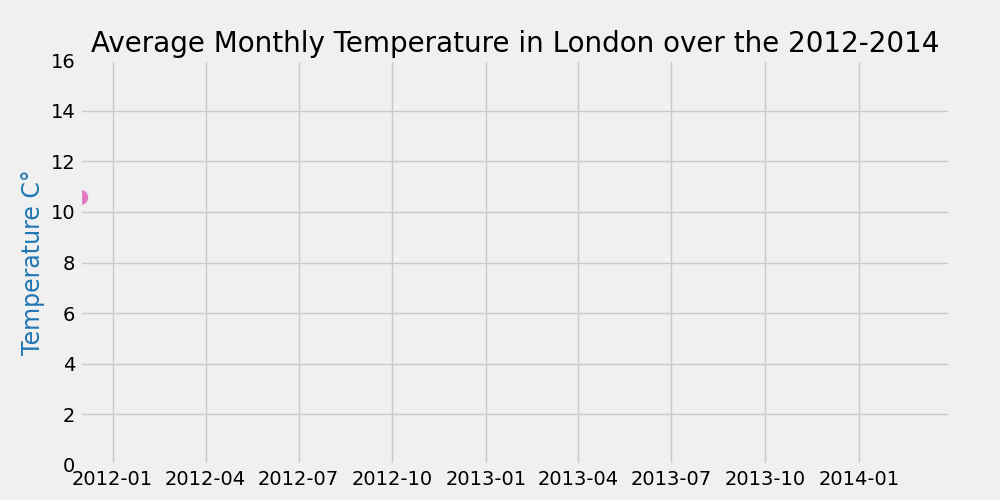

In [ ]:
#saving the GIF
gif.save(frames, "output.gif", duration=0.5 ,unit = 's')

#visualizing the GIF
#HTML('<img src="./output.gif" />')
Image(open('output.gif','rb').read())

In [ ]:
@gif.frame
def plot_split(df, date, split_date):
    df = df.loc[df.index[0]:pd.Timestamp(date)]
    fig, (ax1) = plt.subplots(1, figsize=(10, 5), dpi=100)

    #TRAIN
    if date < pd.Timestamp(split_date):
        ax1.axvspan(START, date, alpha=0.5, color='#33FF92')
        ax1.text(pd.Timestamp('2012-01-31'), y=12, s='Train', fontsize=20)  # where the train text goes
    #TEST
    if (date > pd.Timestamp(split_date)):
        ax1.axvspan(pd.Timestamp(split_date), date, alpha=0.5, color='#F933FF')
        ax1.text(pd.Timestamp('2014-01-31'), y=12, s='Test', fontsize=20)
    ax1.plot(df.temperature, marker='o', linestyle='--', linewidth=3, markersize=10, color='tab:orange')
    maxi = round(df.temperature.max() + 5)

    ax1.set_title('Train/Test-Split', fontsize=20)
    ax1.set_xlim([START, END])
    ax1.set_ylim([0, maxi])
    ax1.set_ylabel('Temperature C°', color='tab:blue', fontsize=17)
frames = []
for date in pd.date_range(start=data.index[0], end=data.index[-1], freq='1M'):
    frame = plot_split(data, date, '2013-06-21')
    frames.append(frame)

gif.save(frames, "output2.gif", duration=0.5, unit='s')

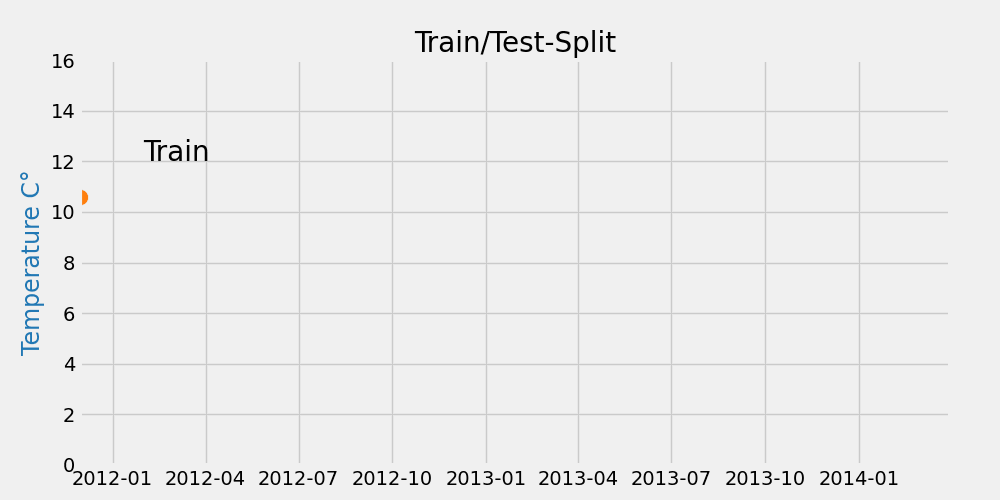

In [ ]:
Image(open('output2.gif','rb').read())

### Subplot Animation

In [ ]:
@gif.frame
def plot(df, date):
    df = df.loc[df.index[0]:pd.Timestamp(date)]
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 5), dpi=100)

    ax1.plot(df.temperature, marker='o', linestyle='--', linewidth=2, markersize=8, color='g')
    maxi = round(df.temperature.max() + 5)
    ax1.set_title('SUBPLOTS', fontsize=20)
    ax1.set_xlim([START, END])
    ax1.set_ylim([0, maxi])
    ax1.set_ylabel('Temperature C°', color='green', fontsize=10)

    ax2.plot(df.visibility, marker='o', linestyle='--', linewidth=2, markersize=8, color='r')
    maxi = round(df.visibility.max() + 3)
    ax2.set_xlim([START, END])
    ax2.set_ylim([0, maxi])
    ax2.set_ylabel('Visibility', color='red', fontsize=10)

    ax3.plot(df.windSpeed, marker='o', linestyle='--', linewidth=2, markersize=8, color='b')
    maxi = round(df.windSpeed.max() + 3)
    ax3.set_xlim([START, END])
    ax3.set_ylim([0, maxi])
    ax3.set_ylabel('Windspeed', color='blue', fontsize=10)


##### CREATE ANIMATIONS ######
frames = []
for date in pd.date_range(start=data.index[0], end=data.index[-1], freq='1M'):
    frame = plot(data, date)
    frames.append(frame)
gif.save(frames, "output3.gif", duration=0.5, unit='s')


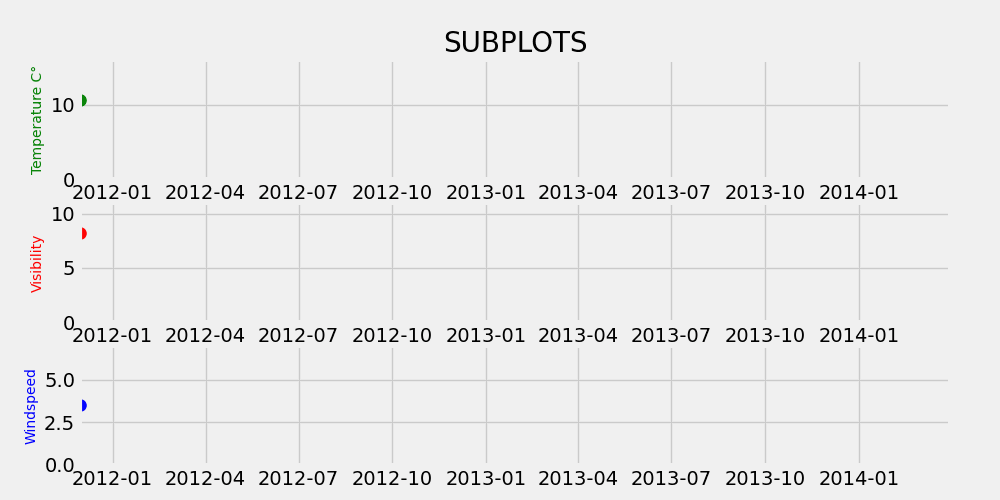

In [ ]:
Image(open('output3.gif','rb').read())